<center><h1>Conceptos básicos de agrupamiento (Clustering)</h1></center>

## 1. Clustering Overview.

Hasta ahora, hemos aprendido acerca de la regresión y la clasificación. Ambos son tipos de [aprendizaje automático supervisado](https://en.wikipedia.org/wiki/Supervised_learning). En el aprendizaje supervisado, puede entrenar un algoritmo para predecir una variable desconocida a partir de variables conocidas.

Otro tipo importante de aprendizaje automático se llama [aprendizaje no supervisado](https://en.wikipedia.org/wiki/Unsupervised_learning). En el aprendizaje no supervisado, no estamos tratando de predecir nada. En cambio, estamos tratando de encontrar patrones en los datos.

Una de las principales técnicas de aprendizaje no supervisado se denomina agrupación (clustering). El clustering se utiliza para explorar un conjunto de datos y comprender las conexiones entre las distintas filas y columnas. Por ejemplo, podemos agrupar jugadores de la NBA en función de sus estadísticas. Así es como se vería tal agrupación:

<img src="figs/yVFklqG.png" alt=cluster width="500" height="400">


Los clústeres permitieron descubrir los roles de los jugadores que de otro modo no se habrían notado. [Aquí](https://flowingdata.com/2012/03/21/redefining-nba-basketball-positions/) hay un artículo que describe cómo se crearon los clústeres.

En algoritmos de agrupamiento (clustering), las filas similares se agrupan. Puede haber más de un grupo en los datos, y estos grupos forman los conglomerados. A medida que observamos los grupos, podemos comenzar a comprender mejor la estructura de los datos.

La agrupación en clústeres es una forma clave de explorar datos desconocidos y es una técnica de aprendizaje automático de uso común. A continuación, trabajaremos en agrupar a los senadores de EE. UU. en función de cómo votaron.

## 2. Los Datos.

En los EE. UU., el Senado vota sobre la legislación propuesta. Para que se promulgue una disposición, el Senado debe aprobar el proyecto de ley. Un proyecto de ley requiere una mayoría de votos para ser aprobado.

Los resultados de estas votaciones, conocidas como votaciones nominales, son públicos y están disponibles en algunos lugares, incluido <a href="https://github.com/unitedstates/congress" target="_blank">aquí</a >. Obtenga más información sobre el sistema legislativo de EE. UU. <a href="https://en.wikipedia.org/wiki/Federal_government_of_the_United_States#Legislative_branch" target="_blank">aquí</a>.

Los senadores suelen votar de acuerdo con la forma en que vota su partido político, lo que se conoce como votación según las líneas del partido. En EE.UU., los <code>2</code> principales partidos políticos son los <a href="https://en.wikipedia.org/wiki/Democratic_Party" target="_blank">Demócratas</a>, que tienden a ser <a href="https://en.wikipedia.org/wiki/Liberalism" target="_blank">liberales</a>, y los <a href="https://en.wikipedia.org /wiki/Republican_Party" target="_blank">Republicanos</a>, que tienden a ser <a href="https://en.wikipedia.org/wiki/Conservadurism" target="_blank">conservadores</a >. Los senadores también pueden optar por no estar afiliados a un partido y votar como independientes, aunque muy pocos eligen hacerlo.

<code>114_congress.csv</code> contiene todos los resultados de las votaciones nominales del 114º Senado. Cada fila representa un solo Senador y cada columna representa un voto. Un <code>0</code> en una celda significa que el Senador votó <code>No</code> por el proyecto de ley, <code>1</code> significa que el Senador votó <code>Sí</code> y <code>0.5</code> significa que el Senador se abstuvo.

Aquí están las columnas relevantes:


- <code>name</code> -- El apellido del Senador.
- <code>party</code> -- El partido político del Senador. Los valores válidos son <code>D</code> para demócrata, <code>R</code> para republicano y <code>I</code> para independiente.
- Varias columnas numeradas como <code>00001</code>, <code>00004</code>, etc. Cada una de estas columnas representa los resultados de una única votación nominal.


A continuación se muestran las tres primeras filas de los datos. Como puede ver, el número de cada proyecto de ley se usa como encabezado de columna para sus votos:

```python
name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
Alexander,R,TN,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
Ayotte,R,NH,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
```
La agrupación de los datos de votación de los senadores es particularmente interesante porque puede exponer patrones que van más allá de la afiliación partidaria. Por ejemplo, algunos republicanos son más liberales que otros. Mirar los datos de votación puede ayudarnos a descubrir a los senadores que están más o menos en la corriente principal de su partido.

### Ejercicio


- Importar la biblioteca Pandas.
- Utilice el método <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">read_csv()</a> en Pandas para leer <code>114_congress.csv</code> en la variable <code>votes</code>.


In [1]:
import numpy as np
import pandas as pd

In [2]:
votes = pd.read_csv('114_congress.csv')

In [3]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
votes.tail()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
99,Wyden,D,OR,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [5]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    100 non-null    object 
 1   party   100 non-null    object 
 2   state   100 non-null    object 
 3   00001   100 non-null    float64
 4   00004   100 non-null    float64
 5   00005   100 non-null    float64
 6   00006   100 non-null    float64
 7   00007   100 non-null    float64
 8   00008   100 non-null    float64
 9   00009   100 non-null    float64
 10  00010   100 non-null    float64
 11  00020   100 non-null    float64
 12  00026   100 non-null    float64
 13  00032   100 non-null    float64
 14  00038   100 non-null    float64
 15  00039   100 non-null    float64
 16  00044   100 non-null    float64
 17  00047   100 non-null    float64
dtypes: float64(15), object(3)
memory usage: 14.2+ KB


## 3. Explorando los datos.

Ahora que hemos leído los datos, hagamos una exploración inicial de los datos.


### Ejercicio


- Averigüe cuántos senadores hay en cada partido.
    - Utilice el método <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html" target="_blank">value_counts()</a> en la columna <code>party</code> de <code>votes</code>. Imprime los resultados.

- Averigüe cuál fue el voto "promedio" para cada proyecto de ley.
    - Use el método <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html" target="_blank">mean()</a> en el dataframe <code>votes</code>. Si la media de una columna es inferior a <code>.5</code>, más senadores votaron en contra del proyecto de ley y viceversa si supera <code>.5</code>. Imprime los resultados.




In [6]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [7]:
print(votes.columns)

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')


In [8]:
votes.loc[:, '00001':].describe().loc[['mean', '50%']].T

,mean,50%
00001,0.325,0.00
00004,0.575,1.00
00005,0.535,1.00
00006,0.945,1.00
00007,0.545,1.00
00008,0.415,0.00
00009,0.545,1.00
00010,0.985,1.00
00020,0.525,1.00
00026,0.545,1.00


In [9]:
votes.loc[:, '00001':].mode()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## 4. Distancia entre Senadores.

Para agrupar a los senadores, necesitamos alguna forma de averiguar cuán "cercanos" están los senadores entre sí. Luego agruparemos Senadores más parecidos. De hecho, podemos descubrir esta distancia matemáticamente, encontrando qué tan similares son los votos de dos senadores. Cuanto más parecidos sean los registros de votación de dos Senadores, más similares serán (votar de la misma manera indica que comparte los mismos puntos de vista).

Para encontrar la distancia entre dos filas, podemos usar la <a href="https://en.wikipedia.org/wiki/Euclidean_distance" target="_blank">distancia euclidiana</a>. La fórmula es:

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$



Digamos que tenemos los registros de votación de dos senadores:

```python
name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
Alexander,R,TN,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
Ayotte,R,NH,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
```

Si solo tomáramos las columnas de votos numéricos, tendríamos esto:

```python
00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
```

Si quisiéramos calcular la distancia euclidiana, introduciríamos los números de los votos en nuestra fórmula:

$d = \sqrt{(0-0)^2 + (1-1)^2 + (1-1)^2 + (1-1)^2 + (1-1)^2 + (0-0)^2 \cdots + (0-0)^2}$

Como puede ver, ¡estos Senadores son muy similares! Si observa los votos anteriores, solo están en desacuerdo en 3 proyectos de ley. La distancia euclidiana final entre estos dos senadores es `1,73`.

Para calcular la distancia euclidiana en Python, usemos <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html" target="_blank">euclidean_distances() </a> en la biblioteca <a href="http://scikit-learn.org/stable/" target="_blank">scikit-learn</a>. El siguiente código determina la distancia euclidiana entre el Senador de la primera fila y el Senador de la segunda fila.

```python
euclidean_distances(votes.iloc[0,3:], votes.iloc[1,3:])
```

Solo es necesario seleccionar columnas después del primer `3` porque los primeros `3` son `name`, `party` y `state`, que no son numéricos.

### Ejercicio


- Calcular la distancia euclidiana entre la primera fila y la tercera fila.
- Asignar el resultado a `distance`.


In [10]:
from sklearn.metrics.pairwise import euclidean_distances

In [11]:
print(votes.iloc[0,3:].shape)
print(votes.iloc[0,3:].values.reshape(1,-1).shape)

distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
print(distance)

(15,)
(1, 15)
[[3.31662479]]


## 5. Agrupamiento inicial.

Usaremos un algoritmo llamado <a href="https://en.wikipedia.org/wiki/K-means_clustering" target="_blank">agrupación de k-medias (k-means)</a> para dividir nuestros datos en grupos. El agrupamiento de k-medias utiliza la distancia euclidiana para formar grupos de senadores similares. Nos sumergiremos en la teoría del agrupamiento de k-medias y construiremos el algoritmo desde cero poesteriormente. Por ahora, es importante comprender la agrupación en clústeres a un alto nivel, por lo que aprovecharemos la librería <a href="http://scikit-learn.org/stable/" target="_blank">scikit-learn</a> para entrenar un modelo de k-medias.

El algoritmo k-medias agrupa a los senadores que votan de manera similar en proyectos de ley en grupos. A cada grupo se le asigna un centro y se calcula la distancia euclidiana de cada Senador al centro. Los senadores se asignan a grupos en función de la proximidad. Creemos que los senadores se agrupan a lo largo de líneas partidarias.

El algoritmo de k-means requiere que especifiquemos el número de grupos por adelantado, porque sospechamos que los grupos se producirán a lo largo de líneas partidarias, y la gran mayoría de los senadores son republicanos o demócratas. Elegiremos <code>2</code> para nuestra cantidad de clústeres.

Usaremos la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" target="_blank">KMeans</a> de scikit-learn para realizar el agrupamiento, porque no estamos prediciendo nada. No hay riesgo de sobreajuste, por lo que entrenaremos nuestro modelo en todo el conjunto de datos. Después del entrenamiento, podremos determinar las etiquetas de grupo que indican el grupo de cada Senador.

Podemos inicializar el modelo así:

<pre><code>kmeans_model = KMeans(n_clusters=2, random_state=1)</code></pre>

El código anterior inicializa el modelo k-means con grupos <code>2</code> y un estado aleatorio de <code>1</code> para permitir que se reproduzcan los mismos resultados siempre que se ejecute el algoritmo.

Entonces podremos usar el métod <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_transform" target="_blank ">fit_transform()</a> para ajustar el modelo a <code>votes</code> y obtener la distancia de cada Senador a cada grupo. El resultado será similar al siguiente ejemplo:

<pre><code class="lang-python">
array([[ 3.12141628,  1.3134775 ],
   [ 2.6146248 ,  2.05339992],
   [ 0.33960656,  3.41651746],
   [ 3.42004795,  0.24198446],
   [ 1.43833966,  2.96866004],
   [ 0.33960656,  3.41651746],
   [ 3.42004795,  0.24198446],
   [ 0.33960656,  3.41651746],
   [ 3.42004795,  0.24198446],
   [ 0.31287498,  3.30758755],
   ...
</pre></code>

Esta es una matriz NumPy con dos columnas. La primera columna es la distancia euclidiana de cada Senador al primer grupo y la segunda columna es la distancia euclidiana al segundo grupo. Los valores en las columnas indican qué tan "lejos" está el Senador de cada grupo. Cuanto más lejos del grupo, menos se alinea el historial de votaciones del Senador con el historial de votaciones del grupo.

### Ejercicio

- Use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_transform" target="_blank">fit_transform( )</a> para ajustar <code>kmeans_model</code> en el dataframe <code>votes</code>. Solo seleccione las columnas después del primer <code>3</code> de <code>votes</code> cuando ajuste. 
- Asigne el resultado a <code>senator_distances</code>.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.loc[:, '00001':])

In [14]:
print(senator_distances.shape)

(100, 2)


In [15]:
print(senator_distances)

[[3.12141628 1.3134775 ]
 [2.6146248  2.05339992]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [1.43833966 2.96866004]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.31287498 3.30758755]
 [0.33960656 3.41651746]
 [3.27058526 0.96734144]
 [0.33960656 3.41651746]
 [3.34875646 0.53945585]
 [0.33960656 3.41651746]
 [1.18084816 3.12695614]
 [1.23852221 3.13536063]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [2.6146248  2.05339992]
 [0.58487332 3.31421108]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.56324683 0.93036231]
 [3.42004795 0.24198446]
 [1.73847904 2.82326711]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.58487332 3.31421108]
 [3.27058526 0.92088553]
 [0.33960656 3.41651746]
 [3.19687093 0.64668818]
 [3.42004795 0.24198446]


## 6. Explorando Clústers

Podemos usar el método Pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html" target="_blank">crosstab()</a> para mostrar cuántos senadores de cada partido terminaron en cada grupo. El método <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html" target="_blank">crosstab()</a> toma dos vectores o Pandas Series y calcula cuántas veces ocurre cada valor único en el segundo vector para cada valor único en el primer vector.

Aquí hay un ejemplo:

```python
is_smoker =       [0,1,1,0,0,1]
has_lung_cancer = [1,0,1,0,1,0]
```

Un <code>0</code> significa <code>Falso</code> y un <code>1</code> significa <code>Verdadero</code>. Una tabla de referencias cruzadas para las dos listas anteriores se vería así:

```python
has_lung_cancer    0     1
smoker
0                  1     2
1                  2     1
```


Podemos extraer las etiquetas de grupo para cada Senador de <code>kmeans_model</code> usando<code>kmeans_model.labels_</code>, luego podemos hacer una tabla comparando estas etiquetas con <code>votes["party"]</code> con <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html" target="_blank">crosstab()</a>. Esto muestra si los grupos tienden a desmoronarse según las líneas partidarias o no.



### Ejercicio
    
- Use el atributo <code>labels_</code> para extraer las etiquetas de <code>kmeans_model</code>. Asigne el resultado a la variable <code>labels</code>.
    
- Utilice el método <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html" target="_blank">crosstab()</a> para imprimir una tabla que compare <code>labels</code> con <code>votes["party"]</code>, en ese orden.

    

In [16]:
labels =  kmeans_model.labels_
print(labels)
print(labels.shape)

[1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0]
(100,)


In [17]:
print(votes['party'])

0     R
1     R
2     D
3     R
4     D
     ..
95    D
96    D
97    D
98    R
99    D
Name: party, Length: 100, dtype: object


In [18]:
pd.crosstab(labels, votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


## 7. Explorando a los senadores en el grupo equivocado.

Parece que nuestros dos grupos se desmoronaron en su mayoría a lo largo de líneas partidarias. El primer grupo contiene <code>41</code> demócratas y dos independientes. El segundo grupo contiene <code>3</code> demócratas y <code>54</code> republicanos.

Ningún republicano parece haber roto las filas del partido para votar con los demócratas, pero <code>3</code> votan de forma similar a los republicanos que a su propio partido. Exploremos estos <code>3</code> con más profundidad para que podamos averiguar por qué.

Podemos hacer esto subdividiendo <code>votes</code> para seleccionar solo las filas donde la columna <code>party</code> es <code>D</code> y la variable <code>labels</code> es <code>1</code>, lo que indica que el Senador está en el segundo grupo.

Podemos realizar este subconjunto con Pandas. El siguiente código selecciona todos los Independientes en el primer grupo:
    
```python
votes[(labels == 0) & (votes["party"] == "I")]
```

Al crear subconjuntos de un DataFrame con varias condiciones, cada condición debe estar entre paréntesis y separada por <code>&amp;</code>.
    
### Ejercicio


- Seleccione todos los senadores que fueron asignados al segundo grupo que eran demócratas. Asigne el subconjunto a <code>democratic_outliers</code>.
- Imprime <code>democratic_outliers</code>.

In [19]:
democratic_outliers = votes[(labels == 1) & (votes['party'] == 'D')].copy()

In [20]:
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## 8. Gráficas.

Una excelente manera de explorar los clústeres es visualizarlos usando <code>matplotlib</code>. Anteriormente, calculamos una matriz <code>senator_distances</code> que muestra la distancia desde cada Senador hasta el centro de cada grupo. Podemos tratar estas distancias como coordenadas <code>x</code> e <code>y</code>, y hacer un diagrama de dispersión que muestre la posición de cada Senador. Esto funciona porque las distancias son relativas a los centros de los grupos.

Al hacer el diagrama de dispersión, también podemos sombrear cada punto según la afiliación partidaria. Esto nos permite ver rápidamente el diseño de los senadores y ver quién cruza las líneas del partido.

### Ejercicio


- Haga un diagrama de dispersión usando <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">plt.scatter()</a>. Pase los siguientes argumentos a la función:
    - <code>x</code> debe ser la primera columna de <code>senator_distances</code>.
    - <code>y</code> debe ser la segunda columna de <code>senator_distances</code>.
    - <code>c</code> debe ser <code>labels</code>. Esto sombrea los puntos según la etiqueta.
    - <code>linewidths</code> debe establecerse en 0


- Use <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show" target="_blank">plt.show()</a> para mostrar el gráfico.

In [21]:
import matplotlib.pyplot as plt

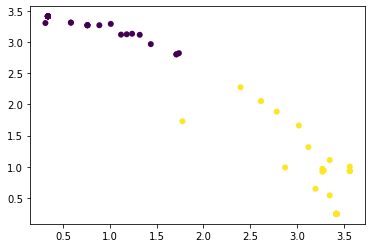

In [22]:
plt.scatter(senator_distances[:,0], senator_distances[:,1], c=labels, lw=0)
plt.show()

## 9. Encontrar lo más extremo.

Los senadores más extremos son los que están más alejados de un grupo. Por ejemplo, un republicano radical estaría lo más lejos posible del grupo demócrata. Los senadores que se encuentran entre ambos grupos son más moderados, ya que se encuentran entre los puntos de vista de los dos partidos.

Si miramos las primeras filas de <code>senator_distances</code>, podemos empezar a ver quién es un extremista:

<pre><code>
[
       [ 3.12141628,  1.3134775 ], # Ligeramente moderado, lejos del grupo 1, cerca del grupo 2.
       [ 2.6146248 ,  2.05339992], # Moderado, lejos del grupo 1, lejos del grupo 2.
       [ 0.33960656,  3.41651746], # Algo extremo, muy cerca del grupo 1, muy lejos del grupo 2.
       [ 3.42004795,  0.24198446], # Bastante extremo, muy lejos del grupo 1, muy cerca del grupo 2.
       ...
   ]    
</pre></code>

Crearemos una fórmula para encontrar extremistas: calcularemos las distancias en ambas columnas de <code>senator_distances</code> y luego las sumaremos. Cuanto más alto sea el exponente, más separación veremos entre valores pequeños y valores bajos. Por ejemplo, elevar <code>[1,2,3]</code> al cuadrado da como resultado <code>[1,4,9]</code>, y elevarlo al cubo da como resultado <code>[1,8,27] </code>.

Calculamos las distancias al cubo para que podamos obtener una buena cantidad de separación entre los extremistas que están más alejados de un grupo.<code>Extremist = [3.4, .24]</code> y <code>moderate = [2.6, 2] </code>. Si dejáramos las distancias como están, terminaríamos con <code>3.4 + .24 = 3.64</code>, y <code>2.6 + 2 = 4.6</code>, lo que haría que el moderado, que es entre ambas partes, parecen extremas. Si elevamos al cubo, terminamos con <code>3.4 ** 3 + .24 ** 3 = 39.3</code>, y <code>2.6 ** 3 + 2 ** 3 = 25.5</code>, que identifica correctamente al extremista.

Así es como se verían las primeras calificaciones:
<pre><code>
[
       [ 3.12141628,  1.3134775 ], # 32.67
       [ 2.6146248 ,  2.05339992], # 26.5
       [ 0.33960656,  3.41651746], # 39.9
       [ 3.42004795,  0.24198446], # 40
       ...
   ]
</pre></code>

Podemos elevar al cubo cada valor en <code>senator_distances</code> escribiendo <code>senator_distances ** 3</code>. Para encontrar la suma en cada fila, necesitaremos usar el método NumPy <a href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html" target="_blank">sum()</a> y pasar el argumento <code>axis=1</code>.
    
### Ejercicio


- Calcule una calificación de extremismo al elevar al cubo cada valor en <code>senator_distances</code>, luego encuentre la suma en cada fila. Asigne el resultado a <code>extremism</code>.
- Asigne la variable <code>extremism</code> a la columna <code>extremism</code> de <code>votes</code>.
- Ordene <code>votes</code> en la columna de extremismo, en orden descendente, utilizando el <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame. sort_values.html#pandas.DataFrame.sort_values" target="_blank">sort_values()</a> en DataFrames.
- Imprima los <code>10</code> senadores más extremos.

In [23]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism'] = extremism

votes.sort_values(by='extremism', ascending=False)['name'].head(10)

98       Wicker
53     Lankford
69         Paul
80        Sasse
26         Cruz
48      Johnson
47      Isakson
65    Murkowski
64        Moran
30         Enzi
Name: name, dtype: object

## 10. ¿Qué sigue?

La agrupación en clústeres es una forma poderosa de explorar datos y encontrar patrones. El aprendizaje no supervisado se usa muy comúnmente con grandes conjuntos de datos donde no es obvio cómo comenzar con el aprendizaje automático supervisado. En general, es una buena idea probar el aprendizaje no supervisado para explorar un conjunto de datos antes de intentar usar modelos de aprendizaje automático de aprendizaje supervisado.

Posteriormente, profundizaremos más en el algoritmo de agrupamiento k-means y construiremos el nuestro desde cero.